In [1]:
%matplotlib inline

In [14]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim

import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
import numpy as np

In [15]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [31]:
mask = list()
for param in net.parameters():
    mask.append(np.random.binomial(1, 0.25, size=(param.detach().numpy()).shape))

[array([[[[0, 0, 0, 1, 0],
          [0, 0, 0, 0, 0],
          [0, 0, 1, 0, 0],
          [0, 0, 0, 1, 1],
          [1, 1, 1, 1, 1]],
 
         [[0, 0, 1, 0, 0],
          [0, 0, 1, 0, 0],
          [0, 0, 0, 0, 0],
          [1, 0, 0, 0, 0],
          [1, 1, 0, 0, 0]],
 
         [[0, 0, 0, 0, 0],
          [1, 0, 0, 1, 0],
          [0, 0, 0, 0, 0],
          [0, 1, 0, 0, 0],
          [0, 0, 0, 0, 0]]],
 
 
        [[[0, 0, 0, 1, 0],
          [0, 0, 0, 0, 0],
          [0, 1, 1, 1, 0],
          [1, 1, 0, 0, 1],
          [0, 0, 0, 0, 0]],
 
         [[0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0],
          [1, 0, 0, 1, 1],
          [0, 1, 0, 1, 1],
          [0, 0, 0, 0, 0]],
 
         [[1, 0, 0, 1, 0],
          [0, 0, 0, 1, 0],
          [1, 0, 1, 1, 0],
          [1, 0, 0, 0, 0],
          [0, 0, 0, 0, 0]]],
 
 
        [[[0, 0, 1, 0, 0],
          [1, 0, 0, 0, 0],
          [1, 0, 0, 1, 0],
          [0, 0, 0, 0, 0],
          [1, 0, 0, 0, 0]],
 
         [[0, 1, 0, 1, 0],
 

In [4]:
import pickle
dists = pickle.load( open( "dists.pkl", "rb" ) )

In [5]:
for param, dist  in zip(net.parameters(), dists):
    s = (param.detach().numpy()).shape
    print(s)
    a = dist.resample(size=s)
    print(a[0].shape)

(6, 3, 5, 5)


ValueError: operands could not be broadcast together with shapes (1,6,3,5,5) (1,5,5,3,6) 

In [13]:
dist.resample((5,5))

array([[[-0.01486303, -0.11502002, -0.23385368, -0.32484883,
          0.04858383],
        [-0.63927781, -0.34327541,  0.03307063,  0.00684732,
         -0.25447388],
        [ 0.04741093,  0.30892178,  0.04839796,  0.08860916,
         -0.11612456],
        [-0.81160784, -0.09060007,  0.06798676, -0.27778544,
          0.32953946],
        [ 0.14057104,  0.14076293, -0.17918687,  0.45320029,
          0.22065858]]])

In [66]:
from scipy import stats
import pickle

paras = list()
dists = list()
for param in net.parameters():
    paras.append((param.view(-1)).detach().numpy())
    dists.append(stats.gaussian_kde(paras[-1]))

pickle.dump( dists, open( "dists.pkl", "wb" ) )

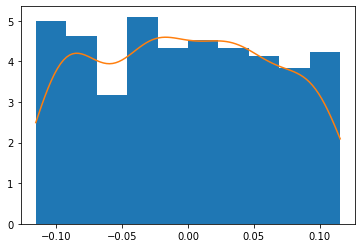

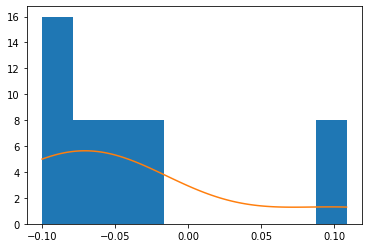

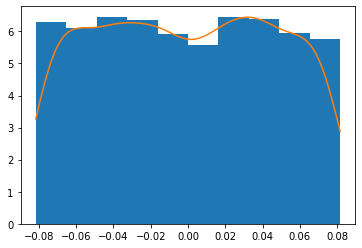

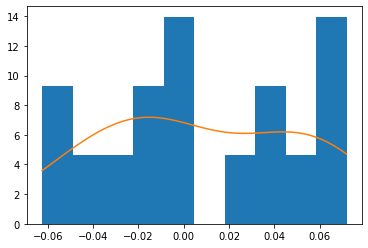

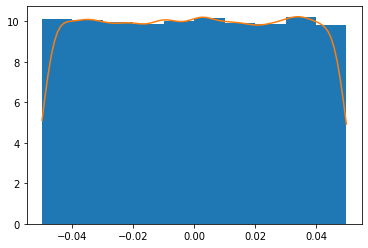

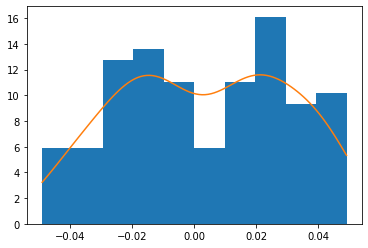

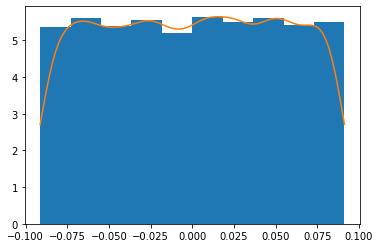

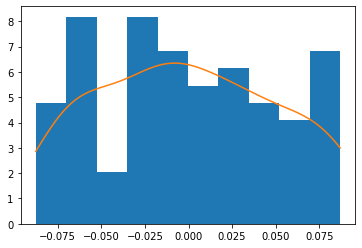

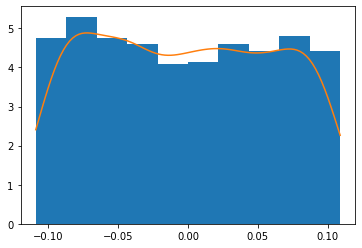

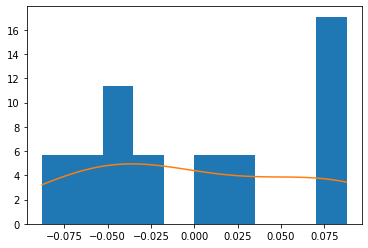

In [58]:
for p, d in zip(paras, dists):
    x_plot = np.linspace(p.min(), p.max(), 100, endpoint=True)
    plt.figure()
    plt.hist(p, density=True)
    plt.plot(x_plot, d.pdf(x_plot))
    plt.show()

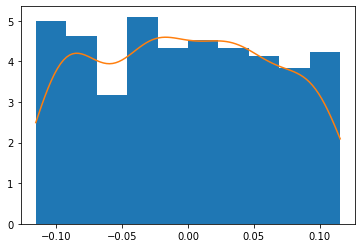

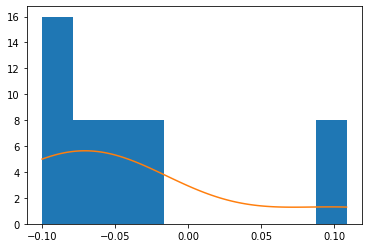

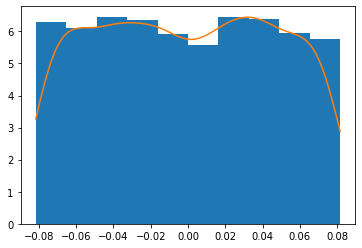

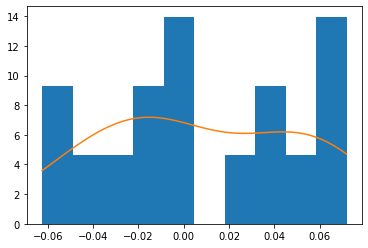

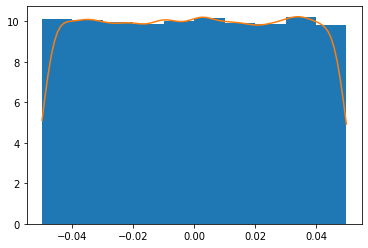

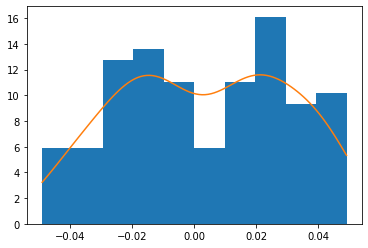

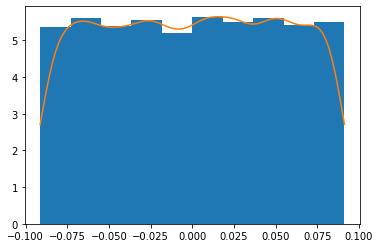

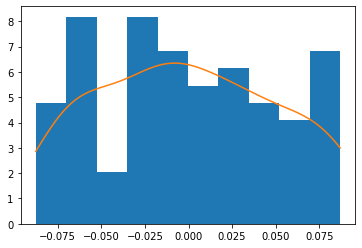

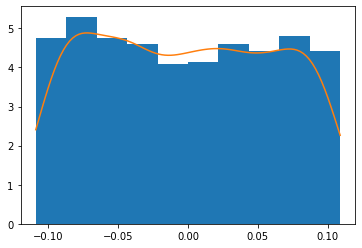

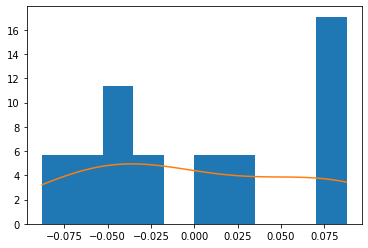

array([-0.92494032, -0.9247816 , -0.92462602, -0.92447358, -0.92432426,
       -0.92417808, -0.92403502, -0.9238951 , -0.92375832, -0.92362466,
       -0.92349414, -0.92336674, -0.92324249, -0.92312136, -0.92300336,
       -0.9228885 , -0.92277677, -0.92266817, -0.9225627 , -0.92246037,
       -0.92236116, -0.92226509, -0.92217215, -0.92208235, -0.92199567,
       -0.92191213, -0.92183172, -0.92175444, -0.92168029, -0.92160928,
       -0.92154139, -0.92147664, -0.92141503, -0.92135654, -0.92130118,
       -0.92124896, -0.92119987, -0.92115391, -0.92111109, -0.92107139,
       -0.92103483, -0.9210014 , -0.9209711 , -0.92094394, -0.92091991,
       -0.920899  , -0.92088123, -0.9208666 , -0.92085509, -0.92084672,
       -0.92084148, -0.92083937, -0.92084039, -0.92084454, -0.92085183,
       -0.92086225, -0.9208758 , -0.92089248, -0.9209123 , -0.92093525,
       -0.92096133, -0.92099054, -0.92102288, -0.92105835, -0.92109696,
       -0.9211387 , -0.92118357, -0.92123158, -0.92128271, -0.92